# Graphics runtime

In this notebook, we examine the runtimes for three different datasets, namely p2p, BPI, and DS3, to see how they vary across different algorithms and models.

### Everything in this notebook can be run on a normal cpu.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("../reports/runtime/Grafiken.xlsx")
df['Data_Model'] = df['Data'] + ' ' + df['Model']
df['Measure_Model'] = df['Measure'] + ' ' + df['Model']
df['Measure_Data'] = df['Measure'] + ' ' + df['Data']

In [3]:
# Multiply the numeric columns by 10000 and keep non-numeric values unchanged forbetter visibility of changes
for col in ['200 Traces', '500 Traces', '800 Traces']:
    df[col] = df[col].apply(lambda x: x * 10000 if isinstance(x, (int, float)) else x)


In [4]:
df

,Measure,Data,Model,200 Traces,500 Traces,800 Traces,Data_Model,Measure_Model,Measure_Data
0,Baseline,P2P,OCPA,88.8,134.0,163.0,P2P OCPA,Baseline OCPA,Baseline P2P
1,Baseline,P2P,Happy Path,70.0,111.0,146.0,P2P Happy Path,Baseline Happy Path,Baseline P2P
2,Baseline,P2P,Flower,101.0,328.0,255.0,P2P Flower,Baseline Flower,Baseline P2P
3,Baseline,P2P,Variant Model,548.0,519.0,831.0,P2P Variant Model,Baseline Variant Model,Baseline P2P
4,Baseline,BPI,OCPA,293.0,481.0,676.0,BPI OCPA,Baseline OCPA,Baseline BPI
5,Baseline,BPI,Happy Path,284.0,512.0,692.0,BPI Happy Path,Baseline Happy Path,Baseline BPI
6,Baseline,BPI,Flower,390.0,1261.0,1745.0,BPI Flower,Baseline Flower,Baseline BPI
7,Baseline,BPI,Variant Model,66024.0,256404.0,669893.0,BPI Variant Model,Baseline Variant Model,Baseline BPI
8,Baseline,DS3,OCPA,1669.0,3186.0,4127.0,DS3 OCPA,Baseline OCPA,Baseline DS3
9,Baseline,DS3,Happy Path,1547.0,6275.0,3829.0,DS3 Happy Path,Baseline Happy Path,Baseline DS3


# Focus on Measures

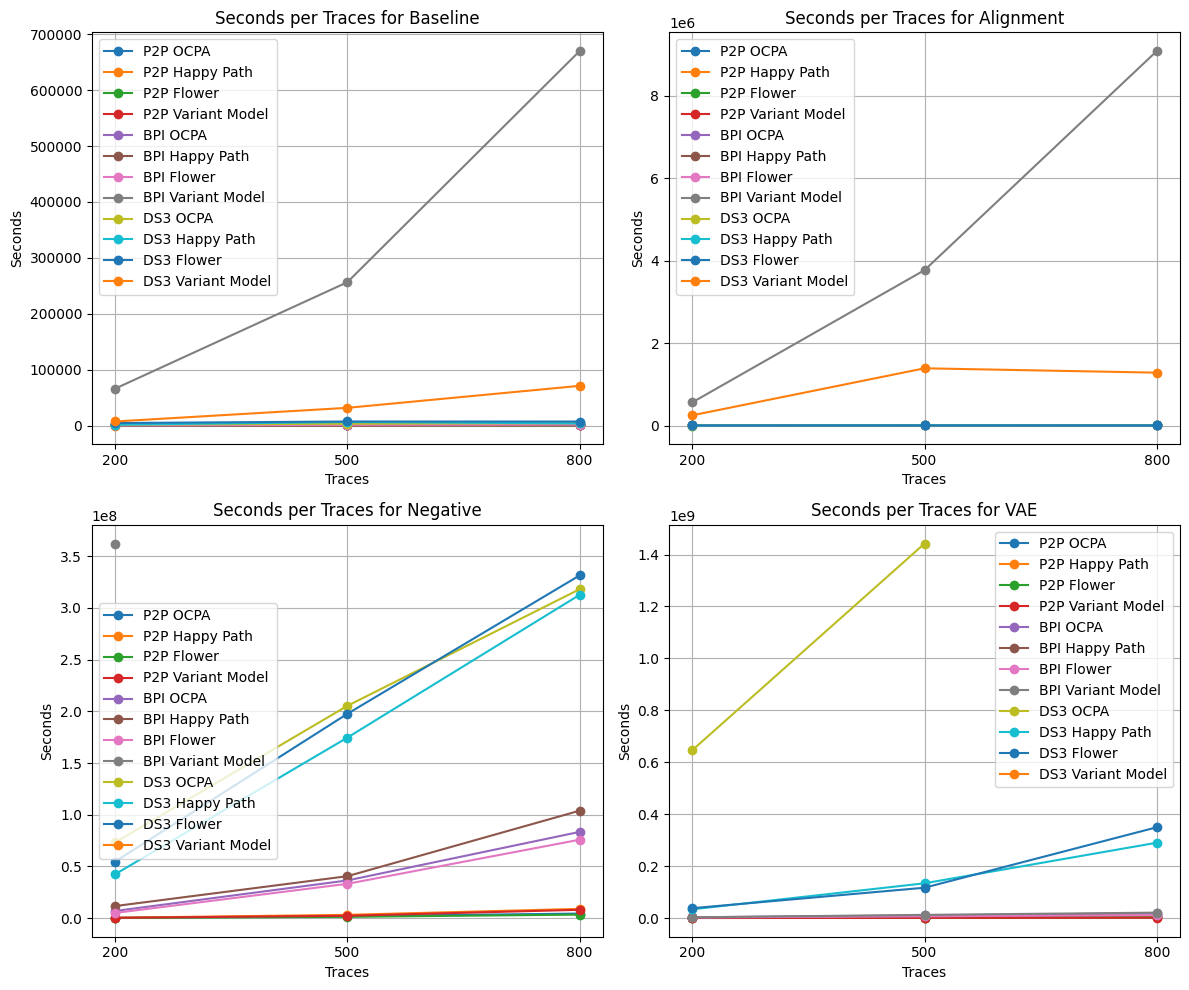

In [5]:
# Get unique measures
measures = df['Measure'].unique()

# Create a 2x2 raster of plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot each measure in a separate subplot
for i, measure in enumerate(measures):
    measure_df = df[df['Measure'] == measure]
    ax = axs[i // 2, i % 2]
    for model in measure_df['Data_Model'].unique():
        model_data = measure_df[measure_df['Data_Model'] == model]
        traces = []
        times = []
        for trace, time in zip(model_data[['200 Traces', '500 Traces', '800 Traces']].values[0], [200, 500, 800]):
            if trace != 'RE' and trace != 'ME':
                traces.append(time)
                times.append(int(trace))
        ax.plot(traces, times, marker='o', label=model)

    ax.set_title(f'Seconds per Traces for {measure}')
    ax.set_xlabel('Traces')
    ax.set_ylabel('Seconds')
    ax.legend()
    ax.set_xticks([200, 500, 800])
    ax.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Focus on Datasets

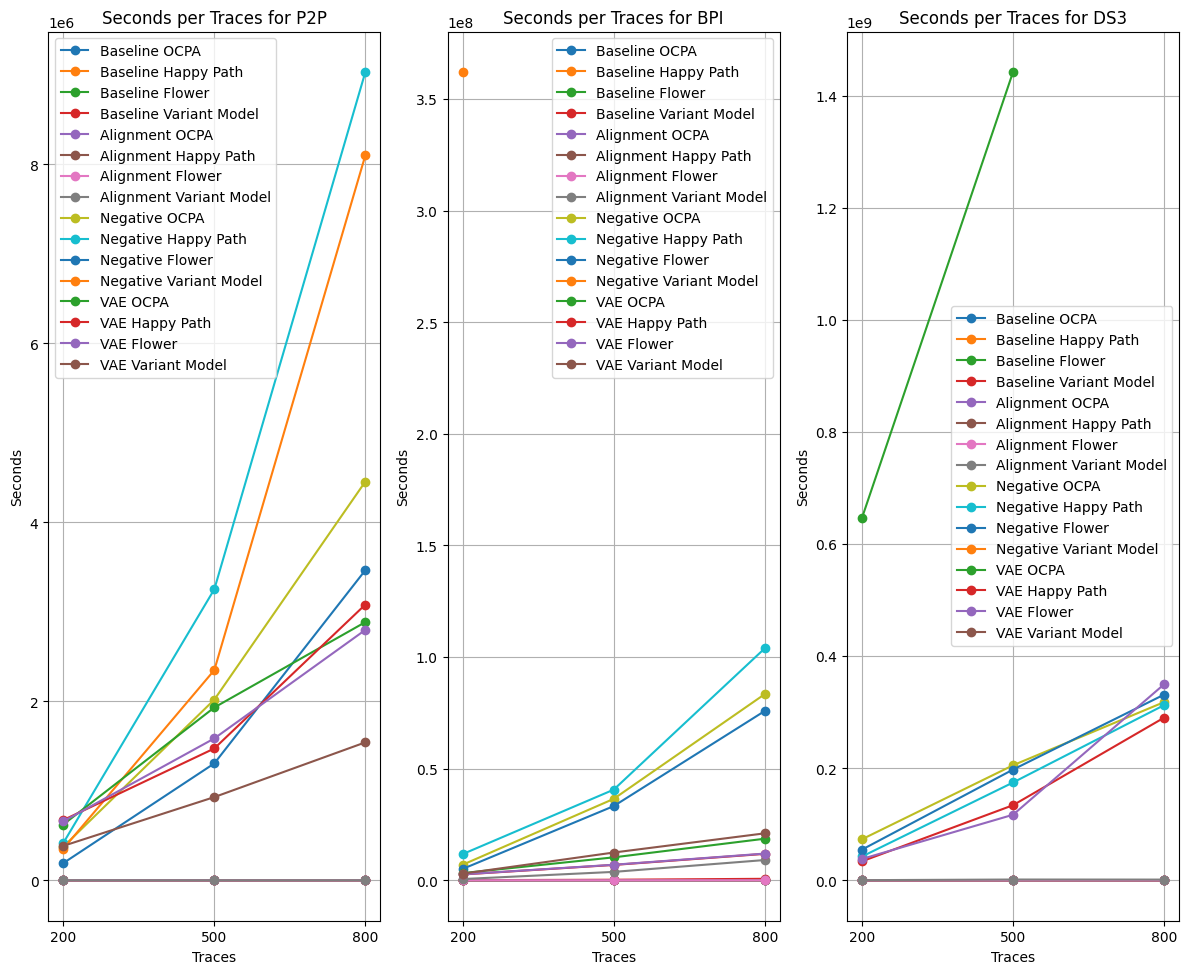

In [6]:
# Get unique measures
measures = df['Data'].unique()

# Create a 2x2 raster of plots
fig, axs = plt.subplots(1, 3, figsize=(12, 10))

# Plot each measure in a separate subplot
for i, measure in enumerate(measures):
    measure_df = df[df['Data'] == measure]
    ax = axs[i]
    for model in measure_df['Measure_Model'].unique():
        model_data = measure_df[measure_df['Measure_Model'] == model]
        traces = []
        times = []
        for trace, time in zip(model_data[['200 Traces', '500 Traces', '800 Traces']].values[0], [200, 500, 800]):
            if trace != 'RE' and trace != 'ME':
                traces.append(time)
                times.append(int(trace))
        ax.plot(traces, times, marker='o', label=model)

    ax.set_title(f'Seconds per Traces for {measure}')
    ax.set_xlabel('Traces')
    ax.set_ylabel('Seconds')
    ax.legend()
    ax.set_xticks([200, 500, 800])
    ax.grid(True)
    
    # Save each plot as an SVG file
    #plt.savefig(f'../reports/runtime/{measure}_{model}.svg')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Save the different figures

In [15]:
# Plot each measure in a separate subplot and save as SVG
for measure in measures:
    measure_df = df[(df['Data'] == measure) & (~df['200 Traces'].isin(['RE', 'ME'])) & (~df['500 Traces'].isin(['RE', 'ME'])) & (~df['800 Traces'].isin(['RE', 'ME']))]
    fig, ax = plt.subplots(figsize=(6, 5))  # Adjust the figure size as needed
    for model in measure_df['Measure_Model'].unique():
        model_data = measure_df[measure_df['Measure_Model'] == model]
        traces = []
        times = []
        for trace, time in zip(model_data[['200 Traces', '500 Traces', '800 Traces']].values[0], [200, 500, 800]):
            traces.append(time)
            times.append(int(trace))
        ax.plot(traces, times, marker='o', label=model)

    ax.set_title(f'Seconds per Traces for {measure}')
    ax.set_xlabel('Traces')
    ax.set_ylabel('Seconds')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticks([200, 500, 800])
    ax.grid(True)

    # Save each plot as an SVG file
    plt.savefig(f'../reports/runtime/{measure}.svg', bbox_inches='tight')
    plt.close()  # Close the current figure to release memory resources
    #plt.tight_layout()
    #plt.show()
    #break


# Focus on Models

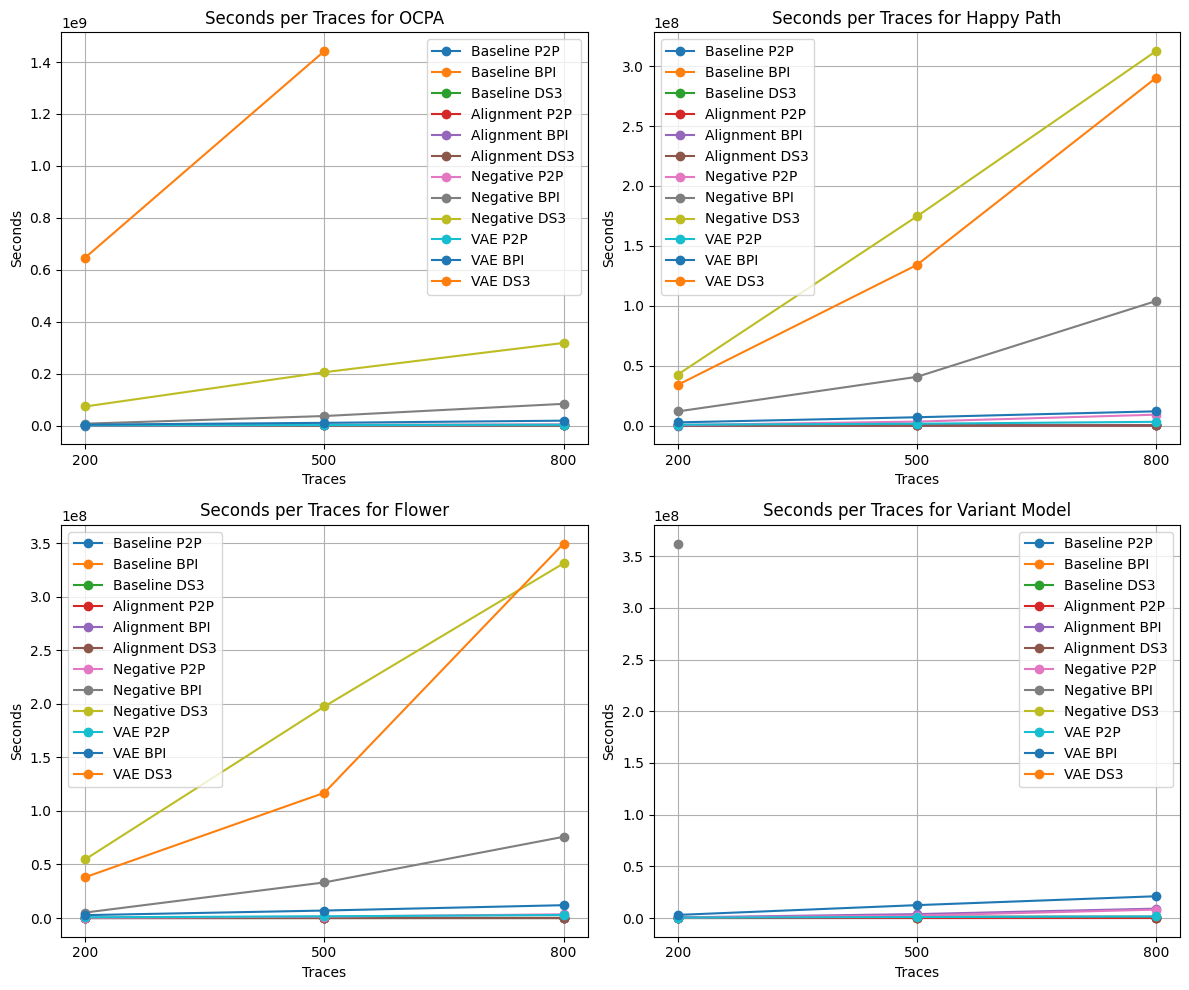

In [7]:
# Get unique measures
measures = df['Model'].unique()

# Create a 2x2 raster of plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot each measure in a separate subplot
for i, measure in enumerate(measures):
    measure_df = df[df['Model'] == measure]
    ax = axs[i // 2, i % 2]
    for model in measure_df['Measure_Data'].unique():
        model_data = measure_df[measure_df['Measure_Data'] == model]
        traces = []
        times = []
        for trace, time in zip(model_data[['200 Traces', '500 Traces', '800 Traces']].values[0], [200, 500, 800]):
            if trace != 'RE' and trace != 'ME':
                traces.append(time)
                times.append(int(trace))
        ax.plot(traces, times, marker='o', label=model)

    ax.set_title(f'Seconds per Traces for {measure}')
    ax.set_xlabel('Traces')
    ax.set_ylabel('Seconds')
    ax.legend()
    ax.set_xticks([200, 500, 800])
    ax.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Focus on Model only in the plot

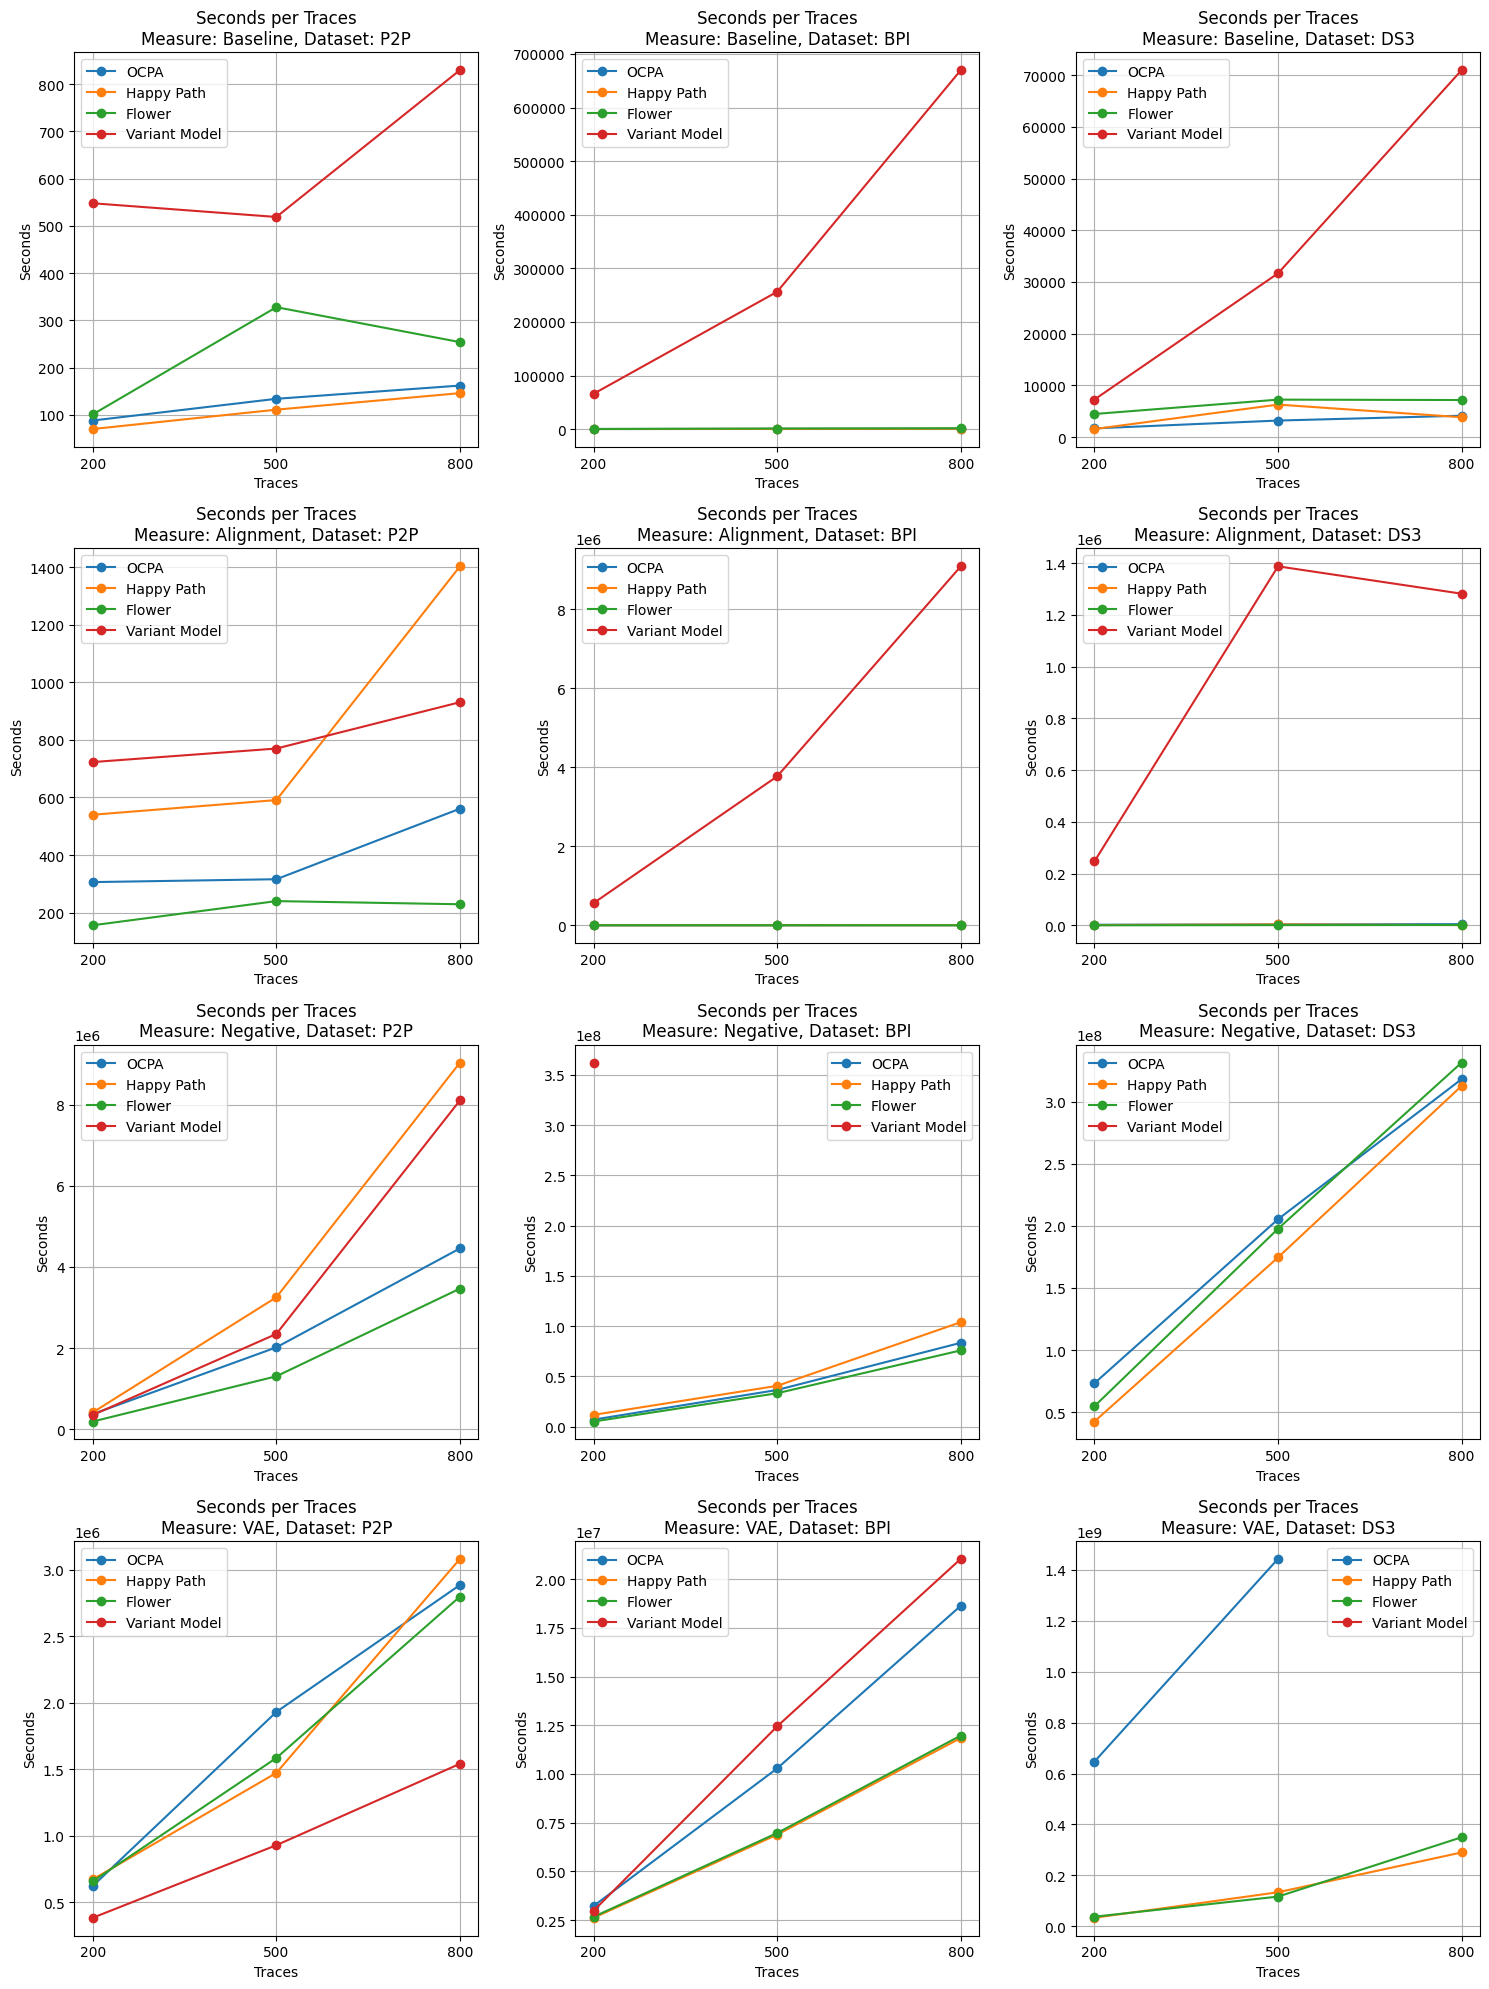

In [8]:
# Get unique measures and datasets
measures = df['Measure'].unique()
datasets = df['Data'].unique()

# Create a 4x3 raster of plots
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for i, measure in enumerate(measures):
    for j, dataset in enumerate(datasets):
        ax = axs[i, j]
        measure_dataset_df = df[(df['Measure'] == measure) & (df['Data'] == dataset)]
        for model in measure_dataset_df['Model'].unique():
            model_data = measure_dataset_df[measure_dataset_df['Model'] == model]
            traces = []
            times = []
            for trace, time in zip(model_data[['200 Traces', '500 Traces', '800 Traces']].values[0], [200, 500, 800]):
                if trace != 'RE' and trace != 'ME':
                    traces.append(time)
                    times.append(int(trace))
            ax.plot(traces, times, marker='o', label=model)

        ax.set_xlabel('Traces')
        ax.set_ylabel('Seconds')
        ax.set_title(f'Seconds per Traces\nMeasure: {measure}, Dataset: {dataset}')
        ax.legend()
        ax.set_xticks([200, 500, 800])
        ax.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()